# Analyzing Amazon Sales Data Using Python

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data= pd.read_csv('/content/Amazon Sales data.csv')
data= pd.DataFrame(data= data)
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [35]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [36]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [37]:
data.shape

(100, 14)

In [38]:
data.size

1400

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [40]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [41]:
data.isna().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [42]:
data.dtypes

,0
Region,object
Country,object
Item Type,object
Sales Channel,object
Order Priority,object
Order Date,object
Order ID,int64
Ship Date,object
Units Sold,int64
Unit Price,float64


In [43]:
data = data.astype({'Ship Date': 'datetime64[ns]','Order Date':'datetime64[ns]'})


In [44]:
data.dtypes

,0
Region,object
Country,object
Item Type,object
Sales Channel,object
Order Priority,object
Order Date,datetime64[ns]
Order ID,int64
Ship Date,datetime64[ns]
Units Sold,int64
Unit Price,float64


<Axes: >

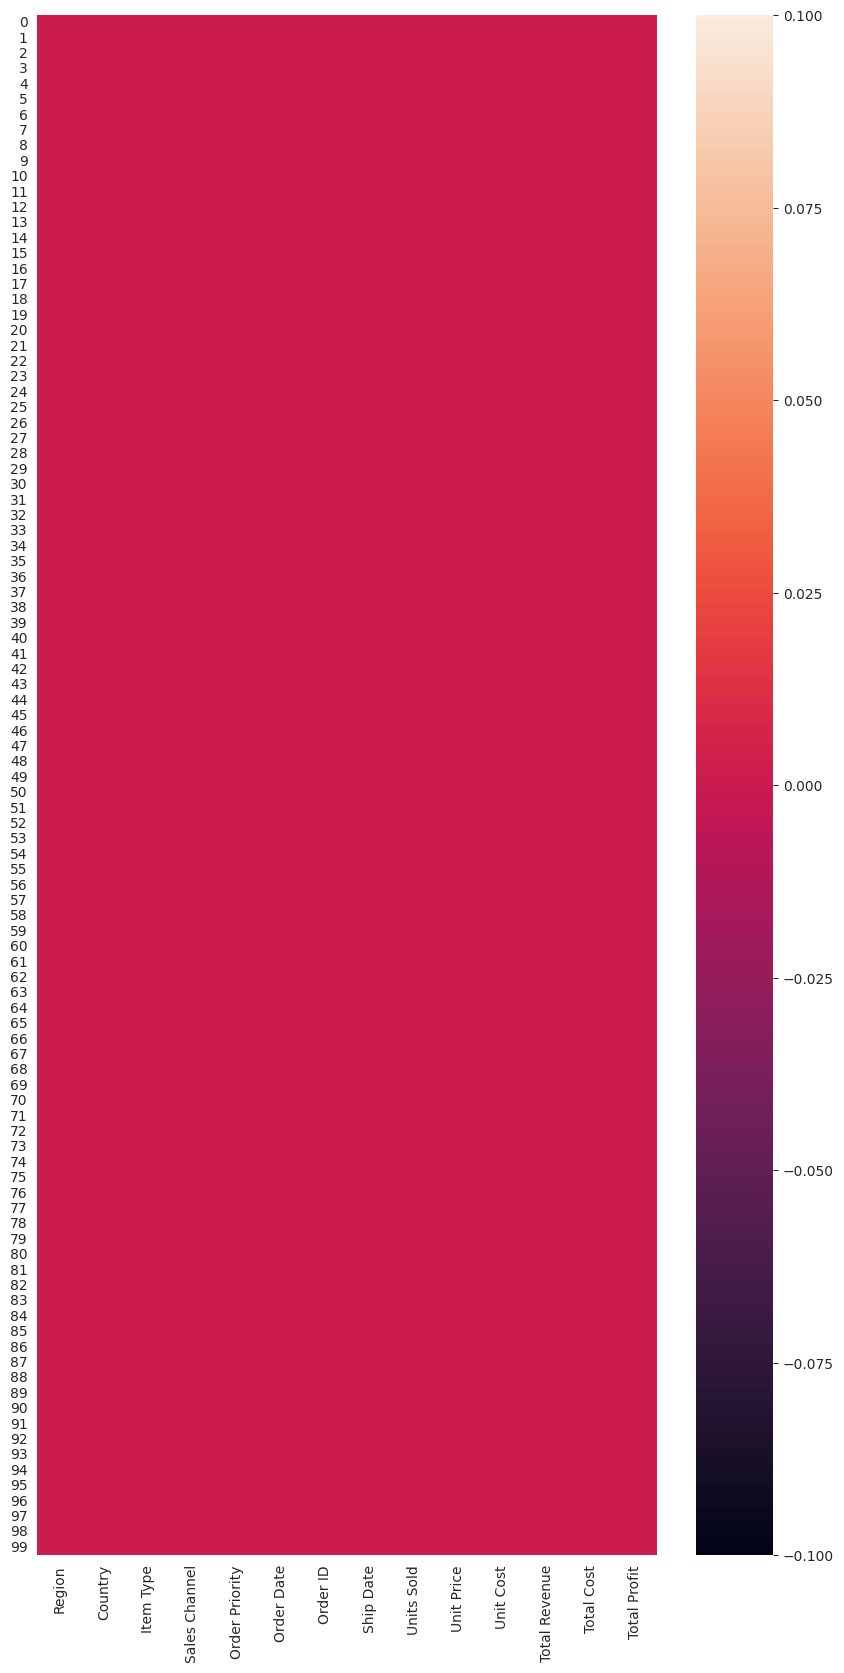

In [45]:
plt.figure(figsize=(10,20))
sns.heatmap(data.isnull()) # NO ANY NULL VALUE PRESENT IN OUR DATASET.

In [46]:
test = data.iloc[0, 12] = np.nan   # ADDING NULL VALUE JUST FOR DEMO
test

nan

<Axes: >

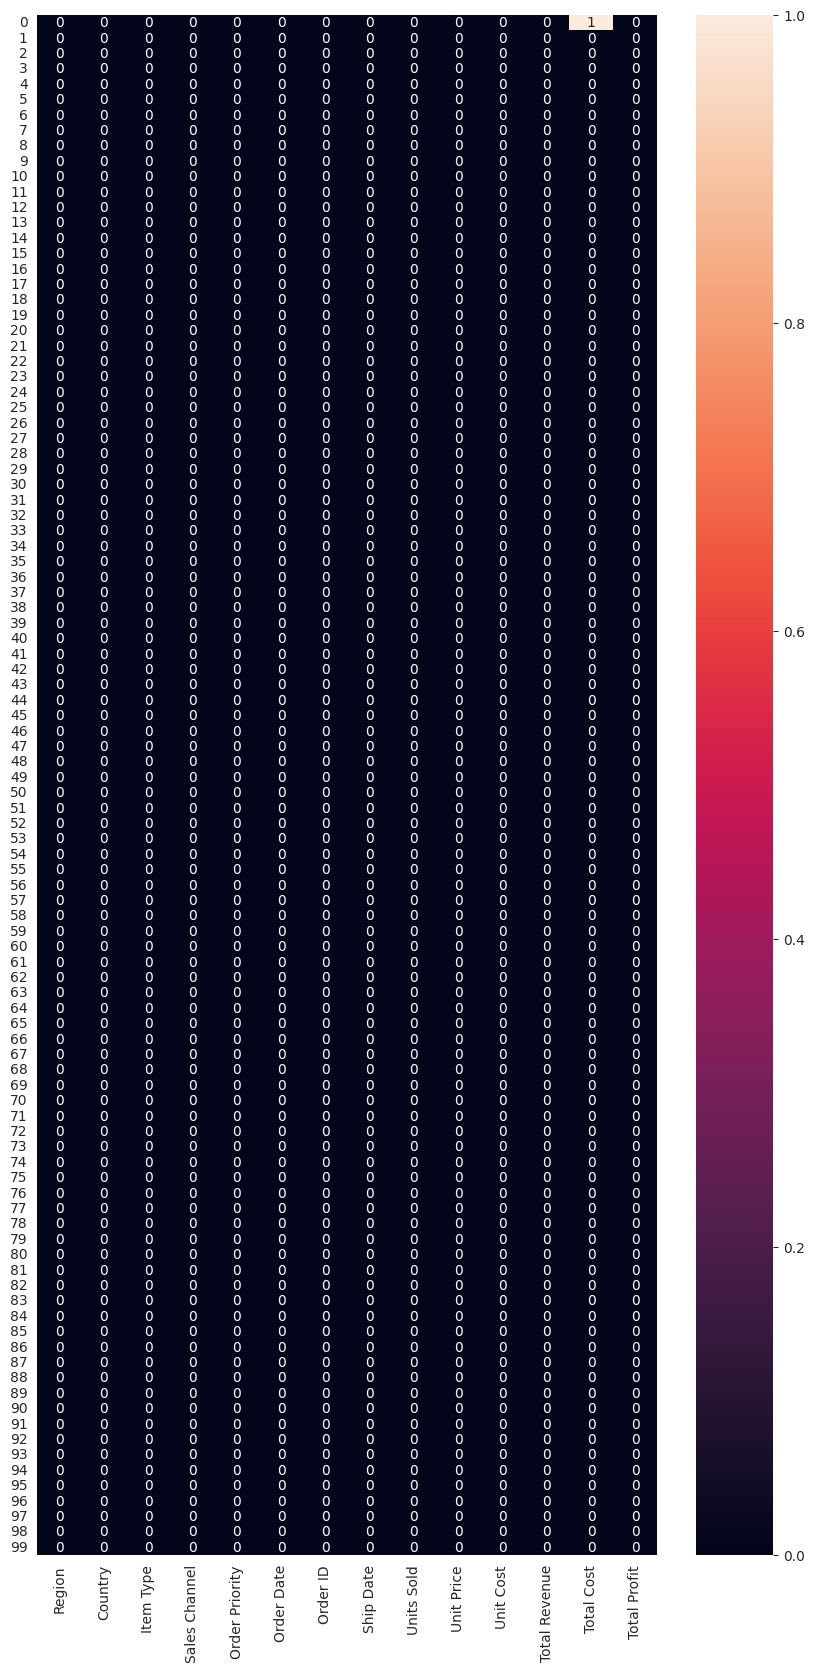

In [47]:
plt.figure(figsize=(10,20))
sns.heatmap(data.isnull(),annot= True) #NULL VALUE FOUND IN 'TOTAL COST' COLUMN

In [48]:
data['Total Cost'] = data['Total Cost'].fillna(data['Total Cost'].mean())   #FILL MEAN WHERE NULL VALUE PRESENT

In [49]:
data['Total Cost']= data['Total Cost'].astype('Float64')
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,925235.620303,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02


<Axes: >

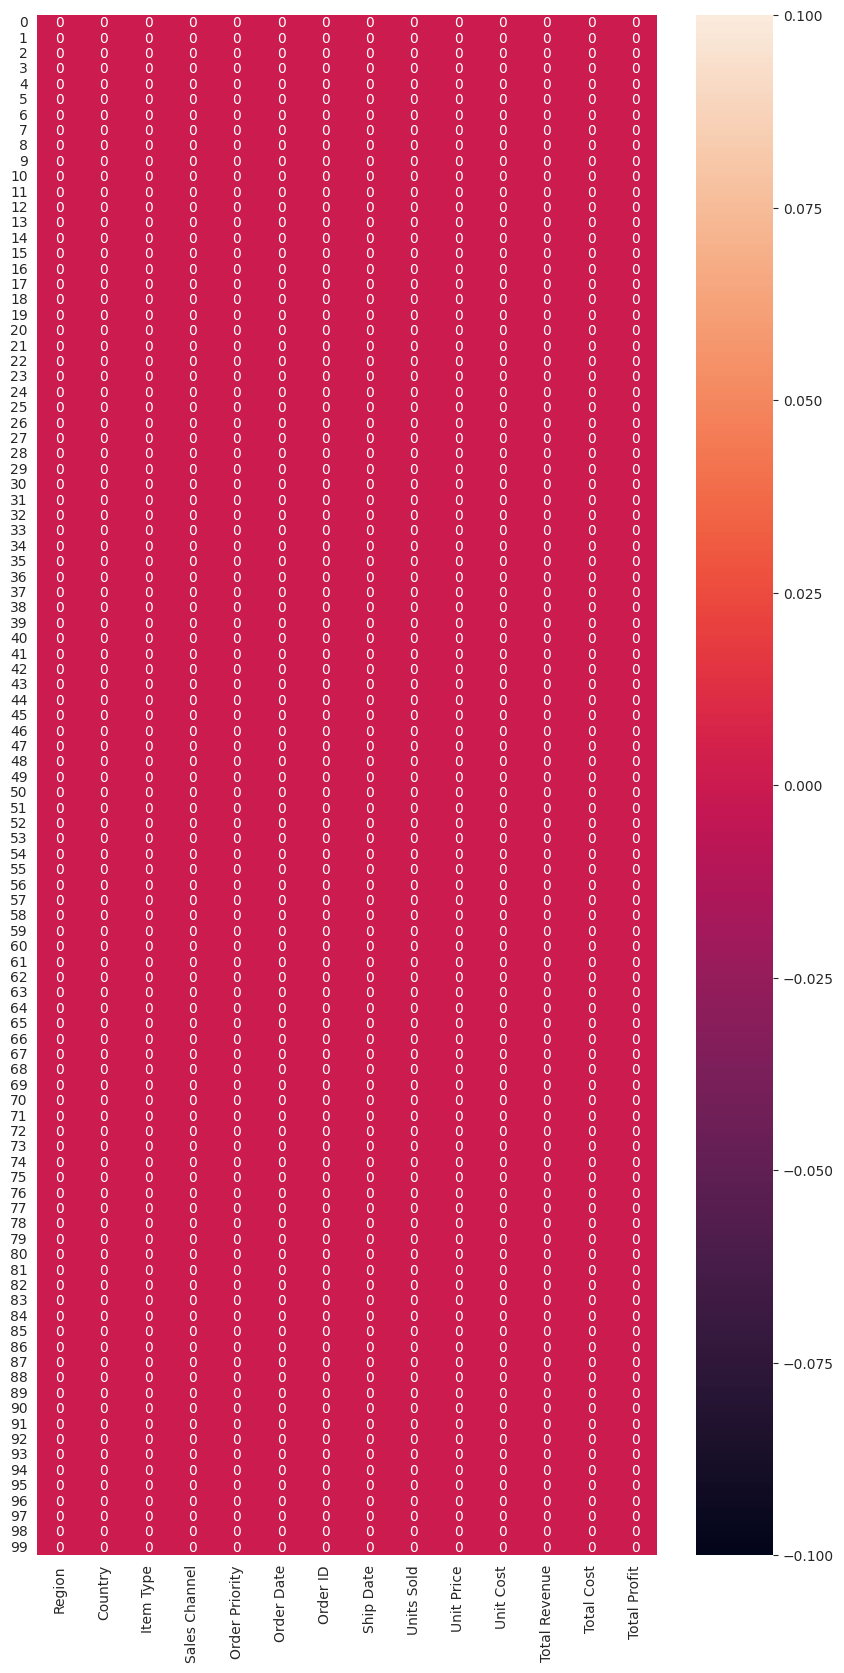

In [50]:
plt.figure(figsize=(10,20))
sns.heatmap(data.isnull(),annot= True)   # NO NULL VALUES

In [51]:
data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,925235.620303,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75


Data Analysis:

Queries:

Which regions have the highest total sales revenue?

What is the average unit price and unit cost for each item type?

Which country has the highest total profit?

How does the sales channel affect the order priority distribution?

What is the average order processing time (duration between order and ship dates) for each sales channel?

Which item types have the highest and lowest total sales?

How does the order priority vary across different regions?

What is the correlation between unit price and total profit?

Are there any seasonal trends or patterns in the sales data?

How does the number of units sold vary across different countries?

1- Which regions have the highest total sales revenue?

In [52]:
Highest_Total_Revenue= data.groupby(data['Region'])['Total Revenue'].sum()
Highest_Total_Revenue.idxmax()


'Sub-Saharan Africa'

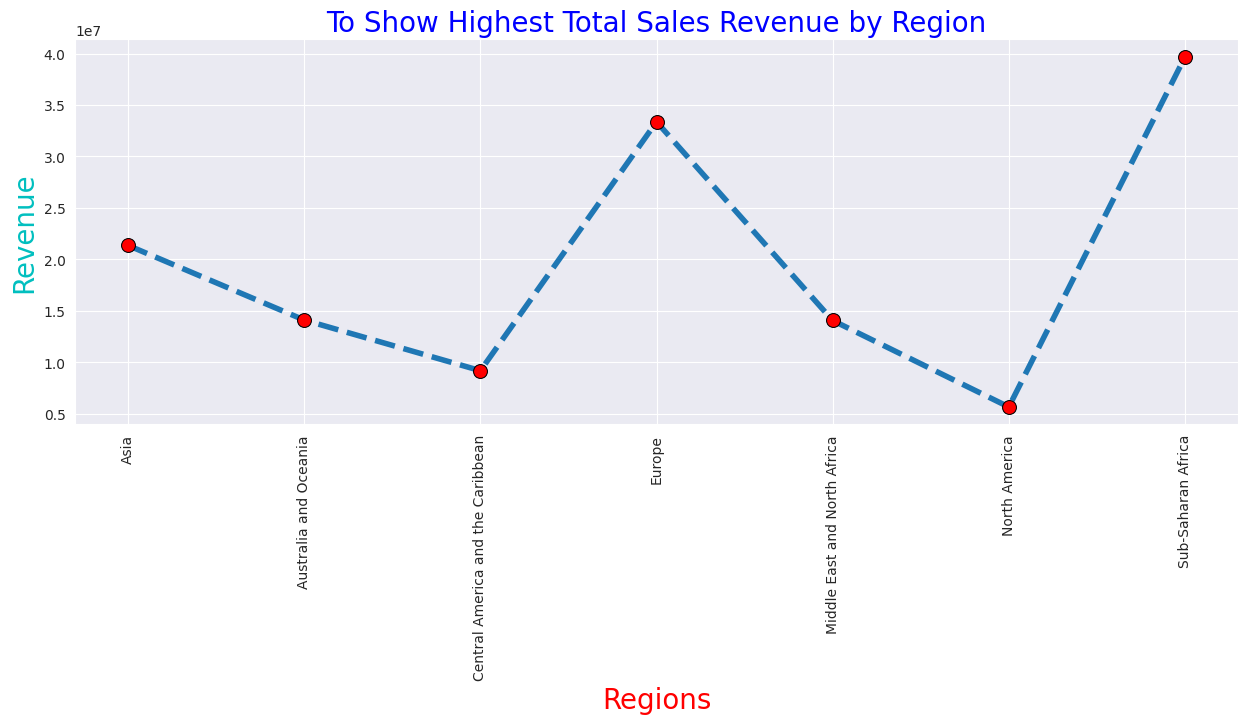

In [53]:

group_data= data.groupby(data['Region'])['Total Revenue'].sum()
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.lineplot(data= group_data, linestyle= '--' ,linewidth= 4 , marker= 'o', markersize= 10,
             markerfacecolor='red', markeredgecolor='black')

plt.xticks(rotation= 90)
plt.title('To Show Highest Total Sales Revenue by Region', fontsize= 20, color= 'Blue')
plt.xlabel('Regions', fontsize= 20, color= 'red')
plt.ylabel('Revenue', fontsize= 20, color= 'c')
plt.show()


# 1e7 is scientific form. it means 1*10**7= 10,000,000

2- What is the average unit price and unit cost for each item type?

In [54]:
Avg_Unit_Price= data.groupby(data['Item Type'])['Unit Price'].mean()
Avg_Unit_Cost= data.groupby(data['Item Type'])['Unit Cost'].mean()

Avg_Price_Cost= pd.DataFrame({'Average Unit Price': Avg_Unit_Price,
                              'Average Unit Cost': Avg_Unit_Cost})

Avg_Price_Cost

,Average Unit Price,Average Unit Cost
Item Type,,
Baby Food,255.28,159.42
Beverages,47.45,31.79
Cereal,205.70,117.11
Clothes,109.28,35.84
Cosmetics,437.20,263.33
Fruits,9.33,6.92
Household,668.27,502.54
Meat,421.89,364.69
Office Supplies,651.21,524.96


3- Which country has the highest total profit?

In [55]:
Total_Profit_By_Comapany= data.groupby(data['Country']) ['Total Profit'].sum()
Highest_Total_Profit_County= Total_Profit_By_Comapany.idxmax()

print("Country with the highest total profit:",Highest_Total_Profit_County)

Country with the highest total profit: Djibouti


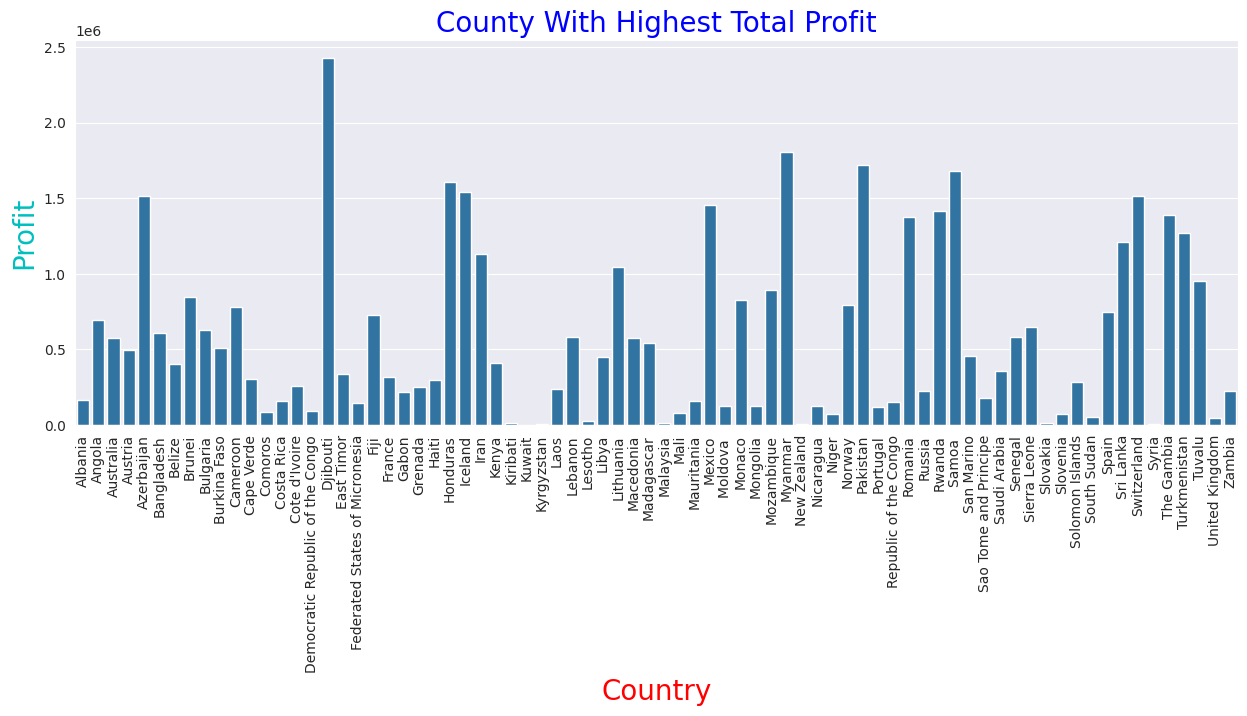

In [56]:
group_data= data.groupby(data['Country']) ['Total Profit'].sum()
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.barplot(x= group_data.index, y= group_data )

plt.xticks(rotation= 90)
plt.title('County With Highest Total Profit', fontsize= 20, color= 'Blue')
plt.xlabel('Country', fontsize= 20, color= 'red')
plt.ylabel('Profit', fontsize= 20, color= 'c')
plt.show()

4- How does the sales channel affect the order priority distribution?

In [57]:
Sales_Channel_Order_Priority_Distribution= data.groupby(data['Sales Channel']) ['Order Priority'].value_counts()
Sales_Channel_Order_Priority_Distribution

Sales Channel  Order Priority
Offline        H                 17
               C                 13
               L                 12
               M                  8
Online         L                 15
               H                 13
               M                 13
               C                  9
Name: count, dtype: int64

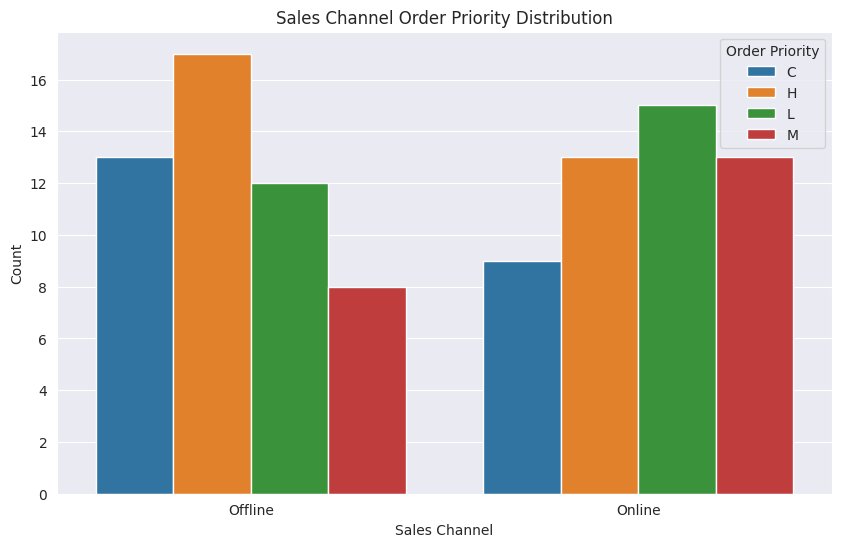

In [58]:


Sales_Channel_Order_Priority_Distribution = data.groupby(['Sales Channel', 'Order Priority'])['Order Priority'].count()

# Reset the index to convert the grouped data into a DataFrame
Sales_Channel_Order_Priority_Distribution = Sales_Channel_Order_Priority_Distribution.reset_index(name='Count')

# Set the style
sns.set_style('darkgrid')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Channel', y='Count', hue='Order Priority', data=Sales_Channel_Order_Priority_Distribution)

# Add labels and title
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Sales Channel Order Priority Distribution')

# Display the plot
plt.show()


5- What is the average order processing time (duration between order and ship dates) for each sales channel?

In [59]:
data['Processing Time']= data['Ship Date']-data['Order Date']

Avg_Processing_Time= data.groupby(data['Sales Channel'])['Processing Time'].mean()
Avg_Processing_Time

,Processing Time
Sales Channel,
Offline,23 days 04:48:00
Online,23 days 12:28:48


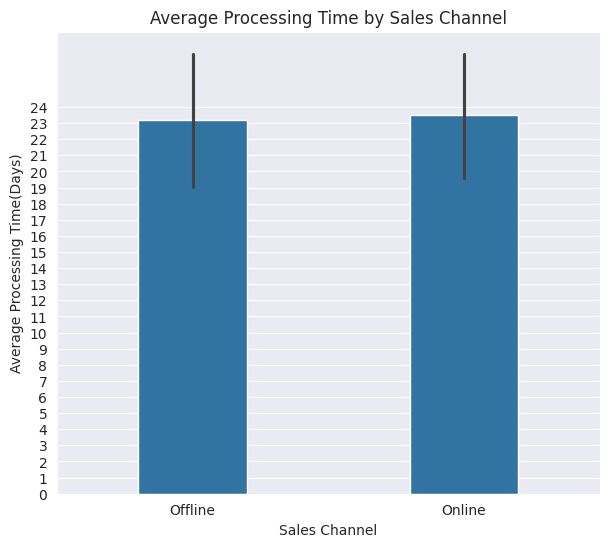

In [60]:
plt.figure(figsize=(7, 6))

sns.barplot(data= data, x= data['Sales Channel'], y=data['Processing Time'].dt.days, width= 0.4 )

plt.title('Average Processing Time by Sales Channel')
plt.xlabel('Sales Channel')
plt.yticks(np.arange(0,25,1))
plt.ylabel('Average Processing Time(Days)')

plt.show()



6- Which item types have the highest and lowest total sales?

In [61]:
group_item_type= data.groupby(data['Item Type'])['Total Revenue'].sum()

highest_sales_revenue_item_type= group_item_type.idxmax()
lowest_sales_revenue_item_type= group_item_type.idxmin()

print("{'Highest Sales Revenue By Item Type':", highest_sales_revenue_item_type, "\n'Lowest Sales Revenue By Item Type':", lowest_sales_revenue_item_type, "}")

{'Highest Sales Revenue By Item Type': Cosmetics 
'Lowest Sales Revenue By Item Type': Fruits }


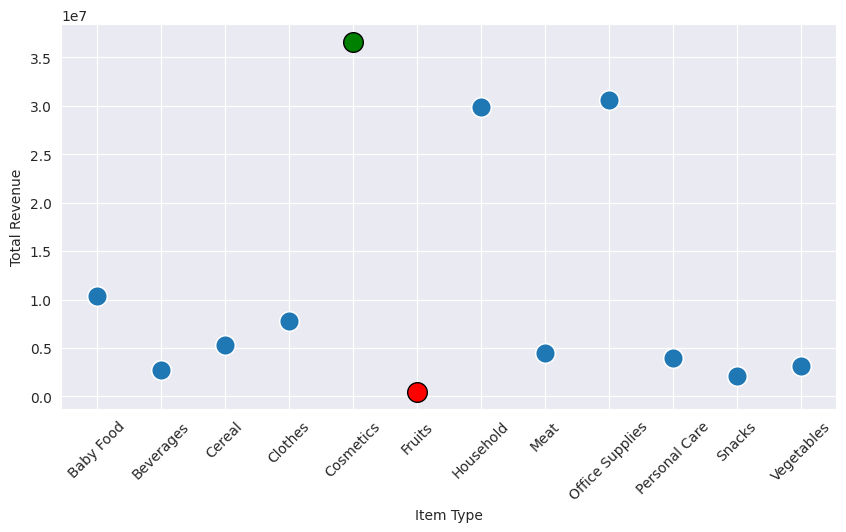

In [62]:
plt.figure(figsize=(10,5))

# Highlight Max Value
sns.scatterplot(x=group_item_type.index, y=group_item_type, s=200)
max_index = group_item_type.idxmax()
plt.scatter(x=max_index, y=group_item_type[max_index], s=200, color='Green', edgecolor='black')

# Highlight the minimum value
min_index = group_item_type.idxmin()
plt.scatter(x=min_index, y=group_item_type[min_index], s=200, color='RED', edgecolor='black')

plt.yticks(rotation= 0)
plt.xticks(rotation= 45)
plt.show()

7- How does the order priority vary across different regions?

In [63]:
Diff_regions_by_order_priority= data.groupby(data['Region'])['Order Priority'].value_counts()
Diff_regions_by_order_priority

Region                             Order Priority
Asia                               L                  4
                                   H                  3
                                   C                  2
                                   M                  2
Australia and Oceania              H                  5
                                   C                  4
                                   L                  1
                                   M                  1
Central America and the Caribbean  C                  2
                                   H                  2
                                   L                  2
                                   M                  1
Europe                             H                  7
                                   L                  6
                                   C                  5
                                   M                  4
Middle East and North Africa       L                  4
                                   M                  4
                                   H                  2
North America                      C                  1
                                   L                  1
                                   M                  1
Sub-Saharan Africa                 H                 11
                                   L                  9
                                   C                  8
                                   M                  8
Name: count, dtype: int64

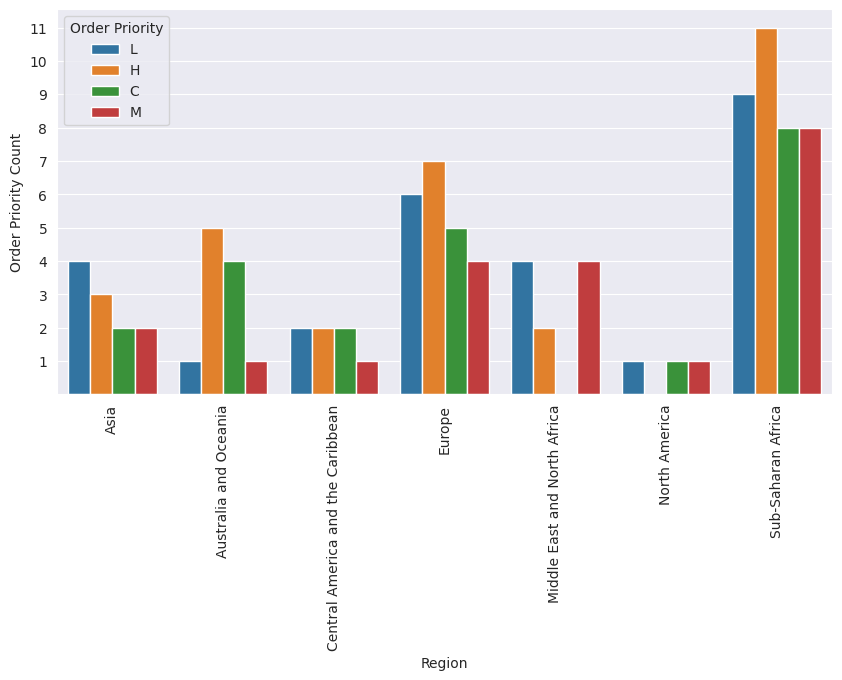

In [64]:
Diff_regions_by_order_priority= data.groupby(data['Region'])['Order Priority'].value_counts().reset_index(name='Order Priority Count')
plt.figure(figsize= (10,5))
sns.barplot(data= Diff_regions_by_order_priority, x= 'Region', y= 'Order Priority Count', hue= 'Order Priority')
plt.xticks(rotation= 90)
plt.yticks(np.arange(1,12,1))

plt.show()

8- What is the correlation between unit price and total profit?

In [65]:
Correlation_Unit_Price_Total_Profit= data['Unit Price'].corr(data['Total Profit'])

print("Correlation between Unit Price and Total Profit:", Correlation_Unit_Price_Total_Profit)


Correlation between Unit Price and Total Profit: 0.5573652488121267


<function matplotlib.pyplot.show(close=None, block=None)>

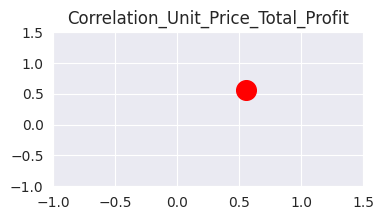

In [66]:
plt.figure(figsize=(4,2))
plt.scatter(x= Correlation_Unit_Price_Total_Profit, y= Correlation_Unit_Price_Total_Profit, s= 200, color= 'RED' )
plt.xticks(np.arange(-1,2,0.5))
plt.yticks(np.arange(-1,2,0.5))
plt.title('Correlation_Unit_Price_Total_Profit')

plt.show

9- Are there any seasonal trends or patterns in the sales data?

In [67]:
month_names= {1: 'JAN',
              2: 'FEB',
              3: 'MAR',
              4: 'APR',
              5: 'MAY',
              6: 'JUN',
              7: 'JUL',
              8: 'AUG',
              9: 'SEPT',
             10: 'OCT',
             11: 'NOV',
             12: 'DEC'}
monthly_sales = data.groupby(data['Order Date'].dt.month)['Total Revenue'].sum()
monthly_sales.index= monthly_sales.index.map(month_names)

monthly_sales


,Total Revenue
Order Date,
JAN,10482467.12
FEB,24740517.77
MAR,2274823.87
APR,16187186.33
MAY,13215739.99
JUN,5230325.77
JUL,15669518.50
AUG,1128164.91
SEPT,5314762.56


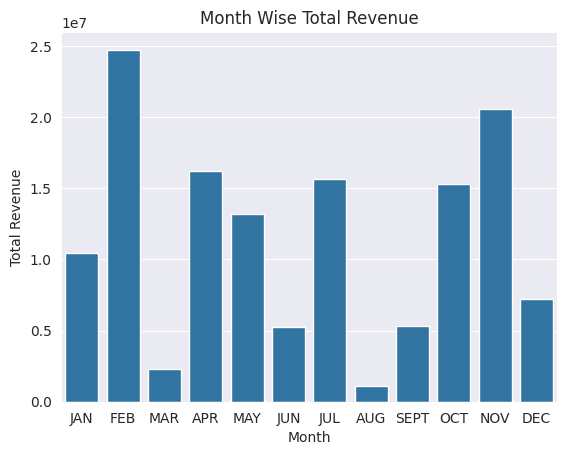

In [68]:

sns.barplot(x= monthly_sales.index, y= monthly_sales)
plt.title('Month Wise Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


10- How does the number of units sold vary across different countries?

In [69]:
Diff_countries_by_unit_sold= data.groupby(data['Country'])['Units Sold'].sum().reset_index(name= 'Unit Sold')
pd.set_option('display.max_rows',None)
Diff_countries_by_unit_sold

,Country,Unit Sold
0,Albania,2269
1,Angola,4187
2,Australia,12995
3,Austria,2847
4,Azerbaijan,9255
5,Bangladesh,8263
6,Belize,5498
7,Brunei,6708
8,Bulgaria,5660
9,Burkina Faso,8082


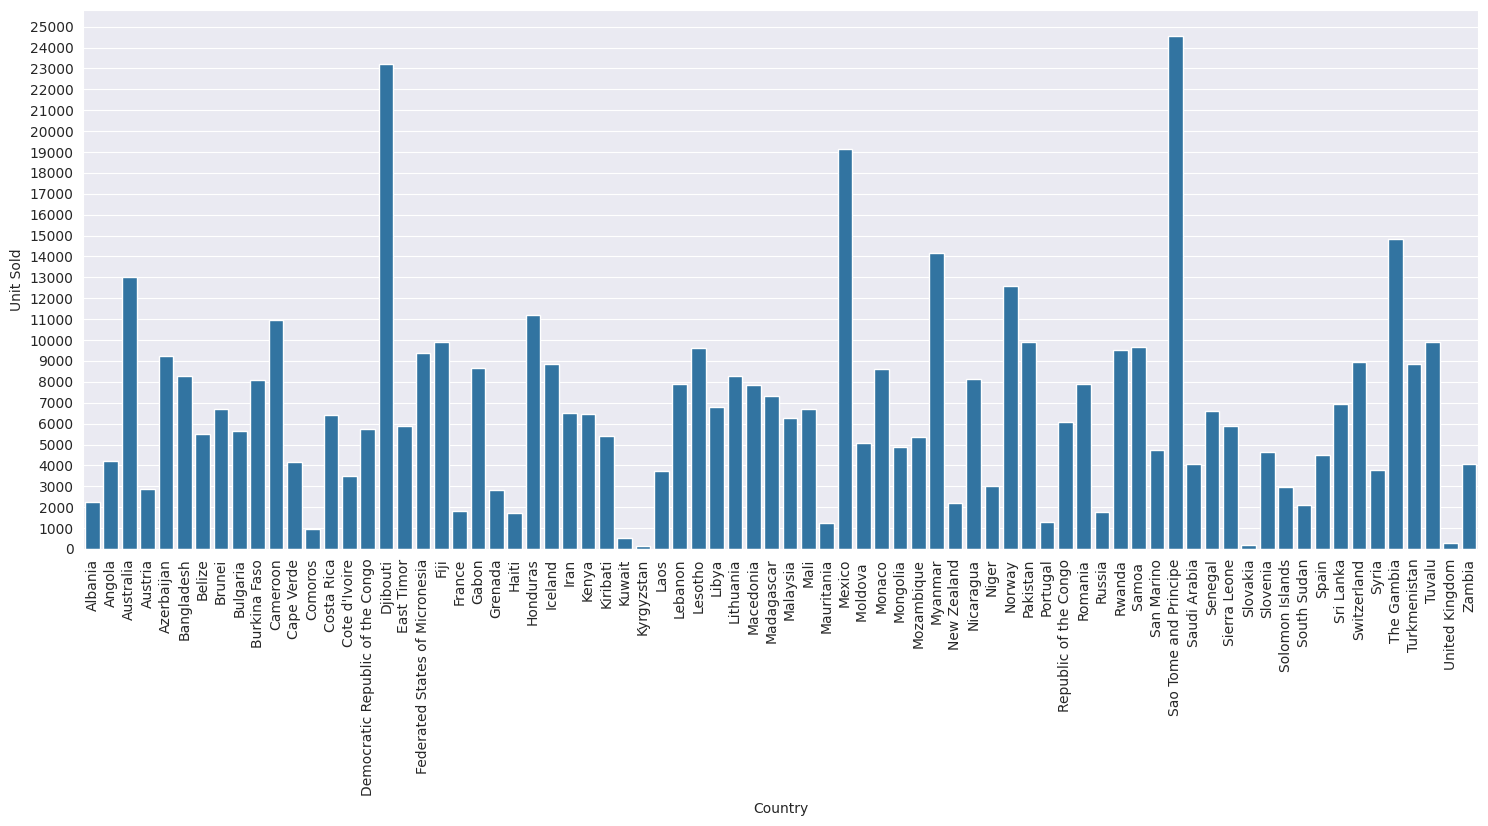

In [70]:
plt.figure(figsize= (18,7))
sns.barplot( data= Diff_countries_by_unit_sold, x= 'Country', y= 'Unit Sold')
plt.xticks(rotation= 90)
plt.yticks(np.arange(0,26000,1000))
plt.show()

Other Queries:

How does the total sales revenue vary across different countries?

What is the distribution of unit prices for each item type?

Which sales channel has the highest average unit price?

Are there any outliers in the total cost distribution?

How does the total profit vary across different item types?

What is the average order processing time for each country?

Which region has the highest average total revenue per order?

Is there a relationship between the number of units sold and the total profit?

How does the order priority vary based on the item type?

Are there any trends or patterns in the order dates?

11- How does the total sales revenue vary across different countries?

In [71]:
sales_revenue_by_countries=  data.groupby(data['Country']) ['Total Revenue'].sum().reset_index(name= 'Total Revenue')
sales_revenue_by_countries

,Country,Total Revenue
0,Albania,247956.32
1,Angola,2798046.49
2,Australia,2489933.49
3,Austria,1244708.40
4,Azerbaijan,4478800.21
5,Bangladesh,902980.64
6,Belize,600821.44
7,Brunei,4368316.68
8,Bulgaria,2779199.71
9,Burkina Faso,1245112.92


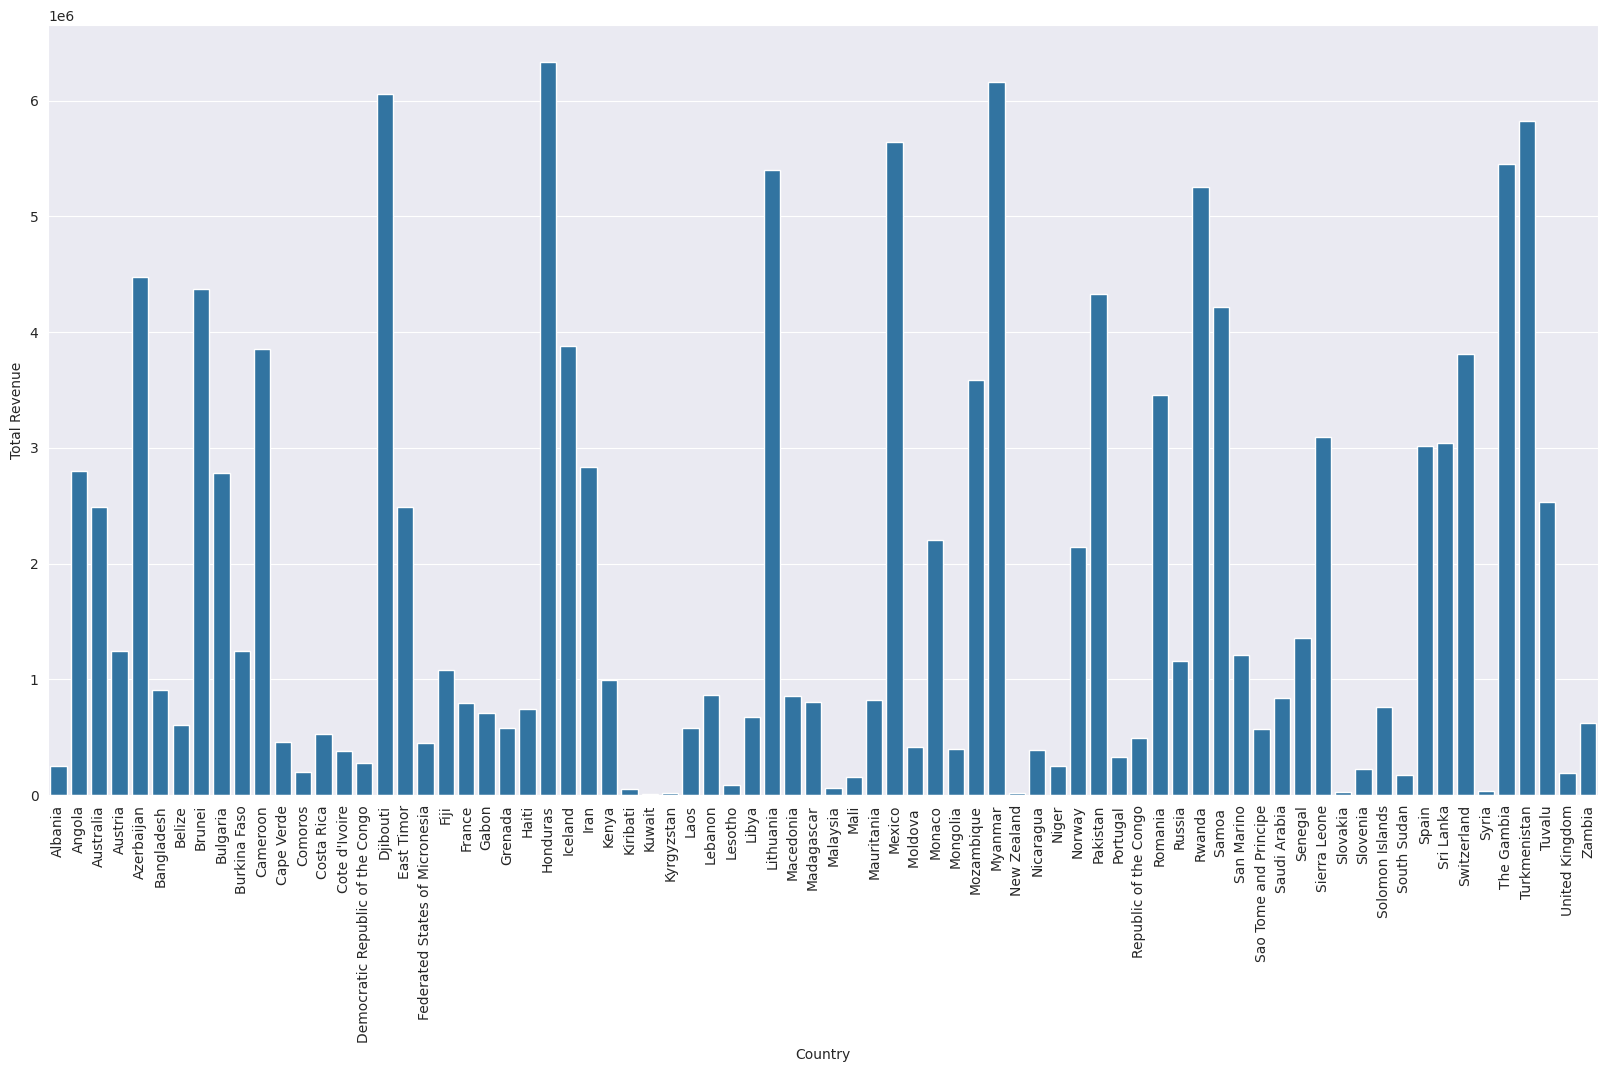

In [72]:
plt.figure(figsize=(20,10))
sns.barplot(x= sales_revenue_by_countries['Country'], y= sales_revenue_by_countries['Total Revenue'])
plt.xticks(rotation= 90)
plt.show()

12- What is the distribution of unit prices for each item type?

In [73]:
unit_price_and_item_type_distribution= data.groupby(data['Item Type'])['Unit Price'].sum().reset_index(name= 'Unit Price')
unit_price_and_item_type_distribution

,Item Type,Unit Price
0,Baby Food,1786.96
1,Beverages,379.60
2,Cereal,1439.90
3,Clothes,1420.64
4,Cosmetics,5683.60
5,Fruits,93.30
6,Household,6014.43
7,Meat,843.78
8,Office Supplies,7814.52
9,Personal Care,817.30


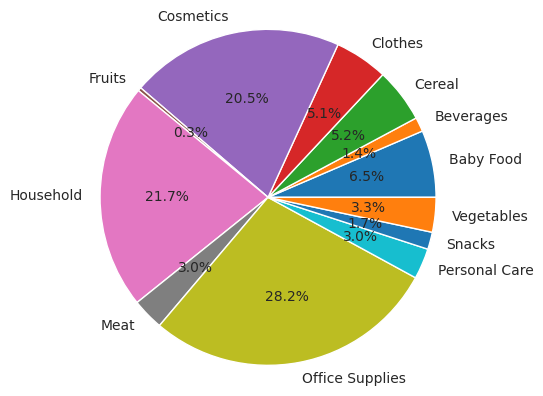

In [74]:
plt.pie(x= unit_price_and_item_type_distribution['Unit Price'], labels= unit_price_and_item_type_distribution['Item Type'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

13- Which sales channel has the highest average unit price?

In [75]:
Highest_avg_unit_price_for_sales_channel= data.groupby(data['Sales Channel']) ['Unit Price'].mean().reset_index(name= 'new')
Highest_avg_unit_price_for_sales_channel



,Sales Channel,new
0,Offline,310.7206
1,Online,242.8020


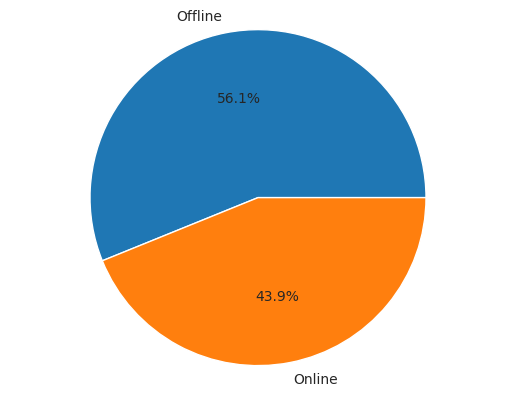

In [76]:
plt.pie(x= Highest_avg_unit_price_for_sales_channel['new'],labels=Highest_avg_unit_price_for_sales_channel['Sales Channel'], autopct= '%1.1f%%')
plt.axis('equal')
plt.show()

14- Are there any outliers in the total cost distribution?

In [77]:


q1= data['Total Cost'].quantile(0.25)
q3= data['Total Cost'].quantile(0.75)

iqr= q3-q1

lower_fence= q1-1.5*iqr
upper_fence= q3+1.5*iqr

outliers= data[(data['Total Cost']<lower_fence)| (data['Total Cost']>upper_fence)].reset_index(drop= True)
outliers



,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Processing Time
0,Central America and the Caribbean,Honduras,Household,Offline,H,2017-02-08,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,5 days
1,Asia,Myanmar,Household,Offline,H,2015-01-16,177713572,2015-03-01,8250,668.27,502.54,5513227.50,4145955.0,1367272.50,44 days
2,Europe,Lithuania,Office Supplies,Offline,H,2010-10-24,166460740,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,24 days


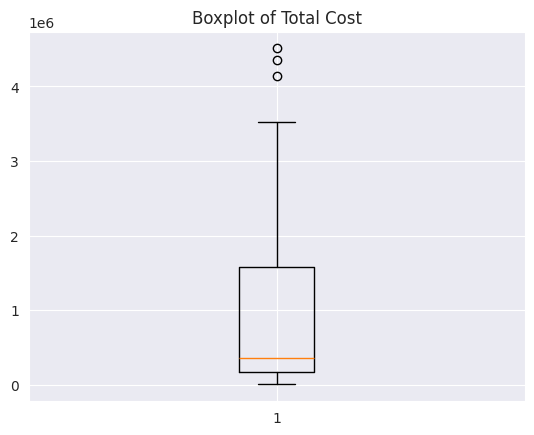

In [78]:

plt.boxplot(data['Total Cost'])
plt.title('Boxplot of Total Cost')
plt.show()


15- How does the total profit vary across different item types?

In [79]:
total_profit_and_diff_item_types= data.groupby(data['Item Type'])['Total Profit'].sum().reset_index(name='Total Profit')
total_profit_and_diff_item_types

,Item Type,Total Profit
0,Baby Food,3886643.70
1,Beverages,888047.28
2,Cereal,2292443.43
3,Clothes,5233334.40
4,Cosmetics,14556048.66
5,Fruits,120495.18
6,Household,7412605.71
7,Meat,610610.00
8,Office Supplies,5929583.75
9,Personal Care,1220622.48


16- What is the average order processing time for each country?

In [80]:
Avg_Processing_Time_by_country= data.groupby(data['Country'])['Processing Time'].mean()
Avg_Processing_Time_by_country

,Processing Time
Country,
Albania,44 days 00:00:00
Angola,4 days 00:00:00
Australia,18 days 16:00:00
Austria,7 days 00:00:00
Azerbaijan,30 days 00:00:00
Bangladesh,47 days 00:00:00
Belize,44 days 00:00:00
Brunei,37 days 00:00:00
Bulgaria,26 days 12:00:00


17- Which region has the highest average total revenue per order?

In [81]:
data['avg total revenue']= data['Total Revenue']/data['Units Sold']
highest_avg_total_revenue_per_order= data.groupby(data['Region']) ['avg total revenue'].mean()
highest_avg_total_revenue_per_order.sort_values(ascending=True)
highest_avg_total_revenue_per_order.head(1)



,avg total revenue
Region,
Asia,335.809091


19- Is there a relationship between the number of units sold and the total profit?

In [82]:
Correlation_unit_sold_and_total_profit= data['Units Sold'].corr(data['Total Profit'])
print(f"Correlation coefficient: {Correlation_unit_sold_and_total_profit}")


Correlation coefficient: 0.5645504620845976


20- How does the order priority vary based on the item type?

In [83]:
Order_priority_vary_on_item_type= data.groupby(data['Order Priority'])['Item Type'].value_counts().reset_index(name= 'No. Of Items')
Order_priority_vary_on_item_type

,Order Priority,Item Type,No. Of Items
0,C,Beverages,7
1,C,Clothes,4
2,C,Office Supplies,2
3,C,Personal Care,2
4,C,Vegetables,2
5,C,Baby Food,1
6,C,Cereal,1
7,C,Cosmetics,1
8,C,Fruits,1
9,C,Household,1
